In [6]:
from dotenv import load_dotenv, find_dotenv
from pydantic import BaseModel, field_validator, ValidationError
from langchain_ollama.chat_models import ChatOllama
from langchain_core.messages import HumanMessage
from langgraph.graph import START, StateGraph, MessagesState, END
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode, tools_condition
from dataclasses import dataclass
from IPython.display import display, Image

In [2]:
find_dotenv()
load_dotenv()

True

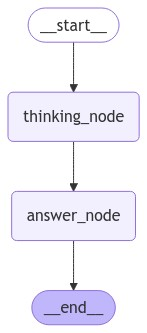

{'answer': 'a beer'}

In [24]:
# Build the State-Schema(s)
@dataclass
class InputState:
    question :str
    
@dataclass
class OutputState:
    answer:str
    
@dataclass
class OverallState:
    question:str
    answer:str
    notes:str
    

def thinking_node(state: InputState):
    return {"answer": "a beer", "notes": "... look for ale"}


def answer_node(state: OverallState) -> OutputState:
    return {"answer": "a beer"}


graph = StateGraph(OverallState, input=InputState, output=OutputState)
graph.add_node("answer_node", answer_node)
graph.add_node("thinking_node", thinking_node)
graph.add_edge(START, "thinking_node")
graph.add_edge("thinking_node", "answer_node")
graph.add_edge("answer_node", END)

graph = graph.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

graph.invoke({"question": "waht is ale"})